# OBJECTIVE:

- Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization
- The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.
* The objective of using this dataset is to analysis the daily level increase in the level of rising COVID-19 cases on timeline axis. We will perform Time Series Analysis to predict the upcoming cases and Recovery rate using ARIMA Model.
* Dataset source:https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv

#### The COVID-19,emerged in Wuhan(China)  in December 2019 has now became a pandemic.India reported COVID-19 first case on 30th January 2020 when a student arrived in Kerala from Wuhan.Now this is widespread in whole India and we are going to analysis the same in this Notebook.

### DATASET DESCRIPTION:

#### The Dataset of COVID_19_India consists of data till date;week after long Lockdown(UNLOCK 1.0) containing following attributes:
* Serial number            : 2774
* Date                     :Date of observation(Till 07-06-2020)
* Time                     : Time of observation
* State/ Union territory   :Name of the State / Union territory
* ConfirmedIndianNational  : Cumulative number of confirmed Indian Nationals
* ConfirmedForeignNational : Cumulative number of confirmed Foreign Nationals
* Cured                    : Cumulative number of cured people
* Deaths                   : Cumulative number of death cases
* Confirmed                : Cumulative number of Confirmed cases

- Total number of Columns: 09
- Total number of Rows   : 2774

In [1]:
#Importing some of the useful libraries for analysis of COVID-19_India dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt

#### Importing Dataset
* Importing dataset in form of .csv(comma seperated file) using the name df for further excecution

In [2]:
# Copy the same path of .csv file where it is located in your folder and then changing '\' to '/' for reading file successfully
# Reading of csv file of COVID-19_India by combining Date and Time in one column and taking Date_Time as index column 
df = pd.read_csv("E:/Garima folder/Dataset/covid-19_India.csv")
df.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [3]:
#DataType of all variables in COVID-19_India Dataset
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

* Parsing object to Datetime format

In [4]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2769,2770,2020-06-07,8:00 AM,Tripura,-,-,173,0,747
2770,2771,2020-06-07,8:00 AM,Uttarakhand,-,-,423,11,1303
2771,2772,2020-06-07,8:00 AM,Uttar Pradesh,-,-,5648,257,9733
2772,2773,2020-06-07,8:00 AM,West Bengal,-,-,3119,383,7738
2773,2774,2020-06-07,8:00 AM,Cases being reassigned to states,-,-,0,0,8605


#### DATA PRE-PROCESSING

##### Data Cleaning is a process of cleaning the data according to our model requirements and situation.

- The solution may not need all the data we got
* we might have to remove columns, modify columns,
* remove duplicate values,
* deal with missing values,
* deal with outlier data etc.
* Sometimes we will also need to normalize or scale data to make the data fit within a range. 

#### Getting the shape of the Dataframe

In [5]:
print(df.shape)

(2774, 9)


#### Checking for the missing values and datatypes for each columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 9 columns):
Sno                         2774 non-null int64
Date                        2774 non-null datetime64[ns]
Time                        2774 non-null object
State/UnionTerritory        2774 non-null object
ConfirmedIndianNational     2774 non-null object
ConfirmedForeignNational    2774 non-null object
Cured                       2774 non-null int64
Deaths                      2774 non-null int64
Confirmed                   2774 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 195.2+ KB


In [7]:
# Checking for the NA values in the dataset
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
#Dropping the SNo and Time in the dataset as its not useful for further analysis
df.drop(['Sno'], axis=1,inplace=True)
df.drop(['Time'], axis=1,inplace=True)
#Removing last row as information for State is missing
df.drop(2773,axis=0,inplace=True)

In [9]:
df.describe()

,Cured,Deaths,Confirmed
count,2773.000000,2773.000000,2773.000000
mean,701.109268,52.689145,1761.873783
std,2526.306497,212.831931,6093.996769
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000
50%,21.000000,1.000000,71.000000
75%,253.000000,15.000000,983.000000
max,37390.000000,2969.000000,82968.000000


### Grouping by three different condition to analyze:

In [10]:
#Grouping different types of cases as per the date
dw=df.groupby(['Date']).agg({"Cured":"sum","Deaths":"sum","Confirmed":"sum"})

## BASIC INFORMATION ANALYSIS:

In [11]:
print("Basic Information")
print("Total Number of Cured cases in India",dw['Cured'].iloc[-1])
print("Total Number of Deaths cases in India",dw['Deaths'].iloc[-1])
print("Total Number of Confirmed cases in India",dw['Confirmed'].iloc[-1])
print("Total Number of Active cases in India",dw['Confirmed'].iloc[-1]-dw['Cured'].iloc[-1]-dw['Deaths'].iloc[-1])
print("Total Number of Closed cases in India",dw['Cured'].iloc[-1]+dw['Deaths'].iloc[-1])

Basic Information
Total Number of Cured cases in India 119293
Total Number of Deaths cases in India 6929
Total Number of Confirmed cases in India 238023
Total Number of Active cases in India 111801
Total Number of Closed cases in India 126222


### VISUALIZATION:

## Active Cases of COVID-19 per day:

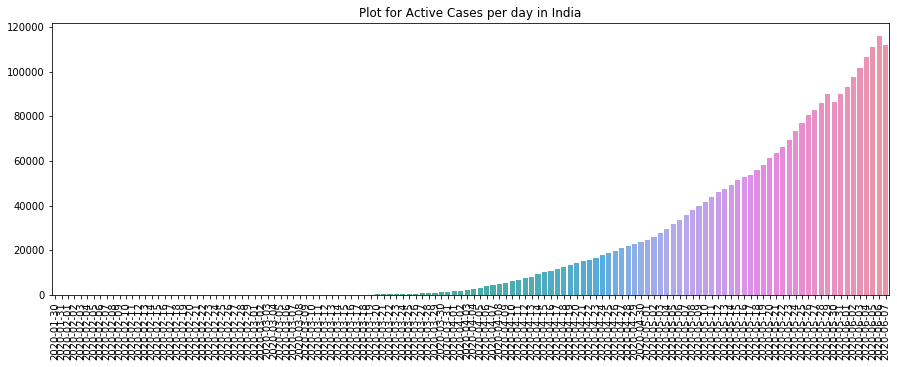

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=dw.index.date,y=dw['Confirmed']-dw['Cured']-dw['Deaths'])
plt.title('Plot for Active Cases per day in India')
plt.xticks(rotation=90)
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 <a list of 130 Text xticklabel objects>)

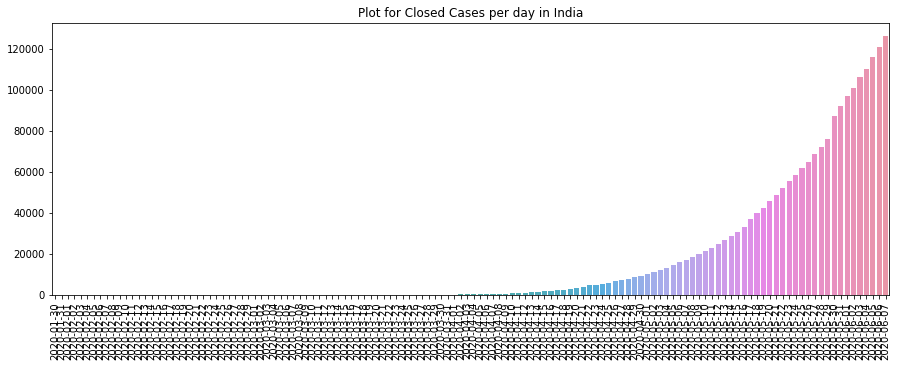

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=dw.index.date,y=dw['Cured']+dw['Deaths'])
plt.title('Plot for Closed Cases per day in India')
plt.xticks(rotation=90)

## Weekly Analysis of COVID-19 Cases:

In [14]:
dw['WeekofYear']=dw.index.weekofyear

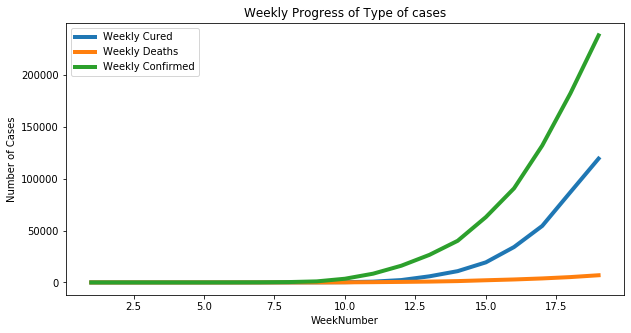

In [15]:
# To check weekly progress of cases
week_num=[]
week_cured=[]
week_deaths=[]
week_confirmed=[]
w=1
for i in list(dw['WeekofYear'].unique()):
    week_cured.append(dw[dw['WeekofYear']==i]['Cured'].iloc[-1])
    week_deaths.append(dw[dw['WeekofYear']==i]['Deaths'].iloc[-1])
    week_confirmed.append(dw[dw['WeekofYear']==i]['Confirmed'].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(10,5))
plt.plot(week_num,week_cured,linewidth=4,label='Weekly Cured')
plt.plot(week_num,week_deaths,linewidth=4,label='Weekly Deaths')
plt.plot(week_num,week_confirmed,linewidth=4,label='Weekly Confirmed')
plt.xlabel('WeekNumber')
plt.ylabel('Number of Cases')
plt.title('Weekly Progress of Type of cases')
plt.legend(loc='best')

* From this plot we can state that at the end of this week there is huge spike in the number of Confirmed Cases when compared to Rate of Death it is quite less which is good information for us to notice that many of confirmed cases are getting cured.

## Weekly Increase Analysis 

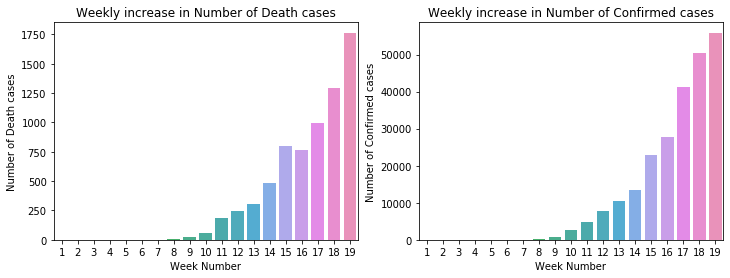

In [16]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(week_deaths).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(week_confirmed).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax1.set_ylabel('Number of Death cases')
ax2.set_ylabel('Number of Confirmed cases')
ax1.set_title('Weekly increase in Number of Death cases')
ax2.set_title('Weekly increase in Number of Confirmed cases')
plt.show()

### Average increase in the number of all Cases:

Average increase in Number of Cured cases: 918.0
Average increase in Number of Deaths cases: 53.0
Average increase in Number of Confirmed cases: 1831.0


C:\Users\Amarnath Gupta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


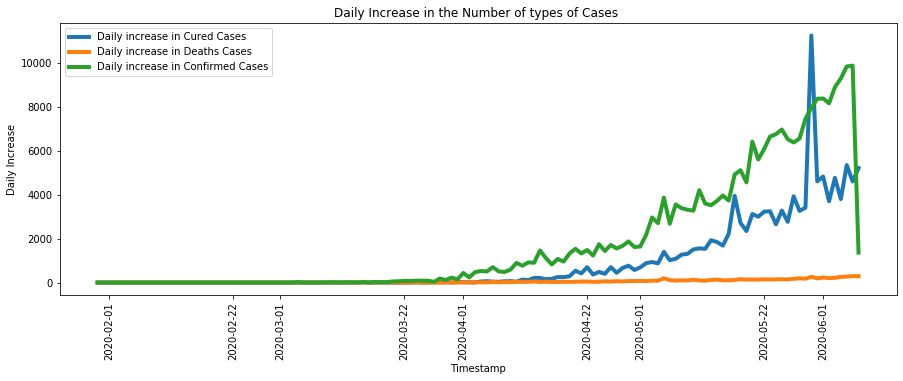

In [17]:
print('Average increase in Number of Cured cases:',np.round(dw['Cured'].diff().fillna(0).mean()))
print('Average increase in Number of Deaths cases:',np.round(dw['Deaths'].diff().fillna(0).mean()))
print('Average increase in Number of Confirmed cases:',np.round(dw['Confirmed'].diff().fillna(0).mean()))

plt.figure(figsize=(15,5))
plt.plot(dw['Cured'].diff().fillna(0),label= 'Daily increase in Cured Cases',linewidth=4)
plt.plot(dw['Deaths'].diff().fillna(0),label= 'Daily increase in Deaths Cases',linewidth=4)
plt.plot(dw['Confirmed'].diff().fillna(0),label= 'Daily increase in Confirmed Cases',linewidth=4)
plt.xlabel('Timestamp')
plt.ylabel('Daily Increase')
plt.title("Daily Increase in the Number of types of Cases ")
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()


* From this we can state that at some point in the beggining of JUNE,2020 first week the number of Recovered Cases is very high.

## State-wise Analysis: 
  * MORTALITY RATE IN DIFFERENT STATES
  * RECOVERY RATE

In [18]:
#State-wise Analysis: Calculating state-wise Mortality Rate(No.of deaths/No. of confirmed cases)
Statewise=df[df['Date']==df['Date'].max()].groupby(['State/UnionTerritory']).agg({"Cured":"sum","Deaths":"sum","Confirmed":"sum"}).sort_values(['Confirmed'],ascending=False)
Statewise['Mortality_Rate']=(Statewise['Deaths']/Statewise['Cured'])*100
Statewise['Recovery_Rate']=(Statewise['Cured']/Statewise['Confirmed'])*100

### TOP-10 States with Highest Confirmed and Death Cases:

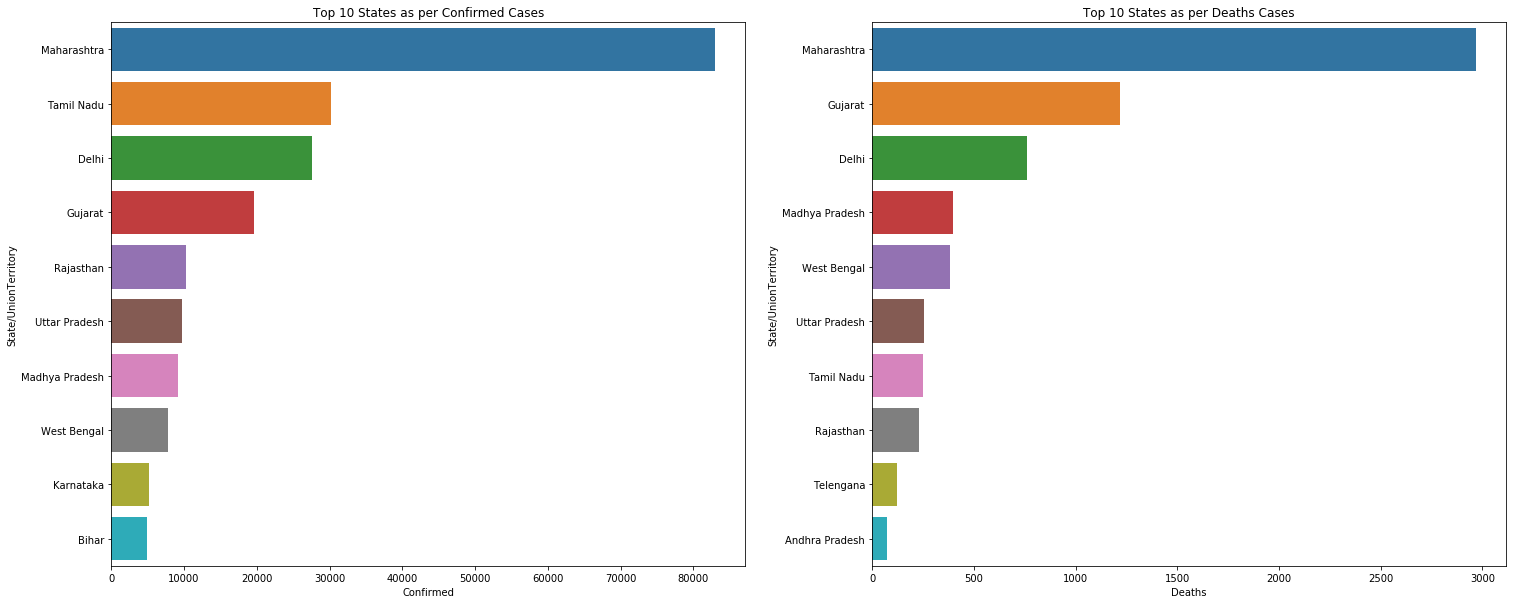

In [20]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(25,10))
top_10_confirmed=Statewise.sort_values(['Confirmed'],ascending=False).head(10)
top_10_deaths=Statewise.sort_values(['Deaths'],ascending=False).head(10)
sns.barplot(x=top_10_confirmed['Confirmed'],y= top_10_confirmed.index,ax=ax1)
sns.barplot(x=top_10_deaths['Deaths'],y= top_10_deaths.index,ax=ax2)
ax1.set_title('Top 10 States as per Confirmed Cases')
ax2.set_title('Top 10 States as per Deaths Cases')
plt.show()

### TOP-10 States with Number of Cured Cases:

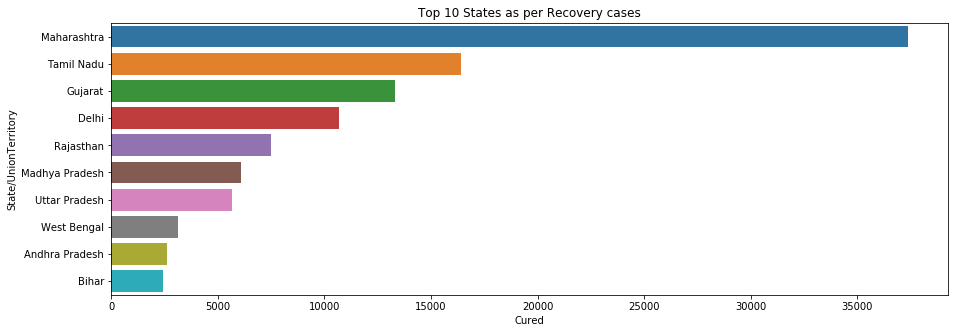

In [19]:
plt.figure(figsize=(15,5))
top_10_cured=Statewise.sort_values(['Cured'],ascending=False).head(10)
sns.barplot(x=top_10_cured['Cured'],y= top_10_cured.index)
plt.title('Top 10 States as per Recovery cases')
plt.show()

### Splitting the dataset into Train and Test:

In [21]:
train=dw.iloc[:int(dw.shape[0]*0.85)]
test=dw.iloc[:int(dw.shape[0]*0.85):]

### Fitting of Model using HOLT'S FORECASTING MODEL:

In [22]:
holt_model=Holt(np.asarray(train['Confirmed'])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=test.copy()
y_pred['Holt']= holt_model.forecast(len(test))

C:\Users\Amarnath Gupta\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
holt_new_date=[]
holt_new_predictions=[]
model_prediction=[]
for i in range(1,18):
    holt_new_date.append(dw.index[-1]+timedelta(days=i))
    holt_new_predictions.append(holt_model.forecast((len(test)+i))[-1])


### Forecasting 20 Days Confirmed Cases :

In [24]:
pd.set_option('display.float_format',lambda x: '%.f'%x)                                
model_prediction = pd.DataFrame(zip(holt_new_date,holt_new_predictions),columns=['Dates','Holt Linear model Prediction'])
model_prediction.head(20)

,Dates,Holt Linear model Prediction
0,2020-06-08,552676
1,2020-06-09,556790
2,2020-06-10,560904
3,2020-06-11,565019
4,2020-06-12,569133
5,2020-06-13,573247
6,2020-06-14,577361
7,2020-06-15,581475
8,2020-06-16,585589
9,2020-06-17,589703
